In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/'Colab Notebooks'/Thesis/PeerRead/code/accept_classify/

/content/drive/MyDrive/Colab Notebooks/Thesis/PeerRead/code/accept_classify


In [ ]:
%ls

classify.py   my_data/  Paper.pdf     run_classify.sh            sent2vec.py
featurize.py  Paper     __pycache__/  run_featurize_classify.sh  tree.dot


# Input

In [ ]:
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

path = lambda x: f"../../data/iclr_2017/train/reviews/{x}"

In [ ]:
def getLogs(name):
  with open(path(name)) as jsonFile:
    file = json.load(jsonFile)
    jsonFile.close()
  logs_train = []
  for item in file['reviews']:
    if item['IS_META_REVIEW'] == False:
      if 'RECOMMENDATION' in item and 'REVIEWER_CONFIDENCE' in item:
        logs_train.append([file['title'], item['comments'], item['RECOMMENDATION'], item['REVIEWER_CONFIDENCE'], item['OTHER_KEYS'], item['DATE'], file['accepted']])
  return logs_train

In [ ]:
allJSON = os.listdir('../../data/iclr_2017/train/reviews/')

allLogs = [getLogs(name) for name in tqdm(allJSON)]

logs = [item for sublist in allLogs for item in sublist]

  0%|          | 0/349 [00:00<?, ?it/s]

In [ ]:
df1 = pd.DataFrame(logs, columns=['title', 'comments','recommendation', 'confidence', 'reviewer', 'date', 'accept'])



---



---



In [ ]:
path_02 = lambda x: f"../../data/iclr_2017/dev/reviews/{x}"

In [ ]:
def getLogs_2(name):
  with open(path_02(name)) as jsonFile:
    file = json.load(jsonFile)
    jsonFile.close()
  logs_val = []
  for item in file['reviews']:
    if item['IS_META_REVIEW'] == False:
      if 'RECOMMENDATION' in item and 'REVIEWER_CONFIDENCE' in item:
        logs_val.append([file['title'], item['comments'], item['RECOMMENDATION'], item['REVIEWER_CONFIDENCE'], item['OTHER_KEYS'], item['DATE'], file['accepted']])
  return logs_val


In [ ]:
allJSON_2 = os.listdir('../../data/iclr_2017/dev/reviews/')

allLogs_2 = [getLogs_2(name) for name in tqdm(allJSON_2)]

logs_2 = [item for sublist in allLogs_2 for item in sublist]

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
df2 = pd.DataFrame(logs_2, columns=['title', 'comments','recommendation', 'confidence', 'reviewer', 'date', 'accept'])



---



---



In [ ]:
path_03 = lambda x: f"../../data/iclr_2017/test/reviews/{x}"

In [ ]:
def getLogs_3(name):
  with open(path_03(name)) as jsonFile:
    file = json.load(jsonFile)
    jsonFile.close()
  logs_test = []
  for item in file['reviews']:
    if item['IS_META_REVIEW'] == False:
      if 'RECOMMENDATION' in item and 'REVIEWER_CONFIDENCE' in item:
        logs_test.append([file['title'], item['comments'], item['RECOMMENDATION'], item['REVIEWER_CONFIDENCE'], item['OTHER_KEYS'], item['DATE'], file['accepted']])
  return logs_test

In [ ]:
allJSON_3 = os.listdir('../../data/iclr_2017/test/reviews/')

allLogs_3 = [getLogs_3(name) for name in tqdm(allJSON_3)]

logs_3 = [item for sublist in allLogs_3 for item in sublist]

  0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:
df3 = pd.DataFrame(logs_3, columns=['title', 'comments','recommendation', 'confidence', 'reviewer', 'date', 'accept'])

In [ ]:
logs = [df1, df2, df3]

reviews = pd.concat(logs)

# Plots

In [ ]:
path = '../../my_data/Figures/Pre-Analysis-'

## Reviewer recommendation by confidence 

In [ ]:
reviews = reviews.groupby(['title','reviewer']).last()

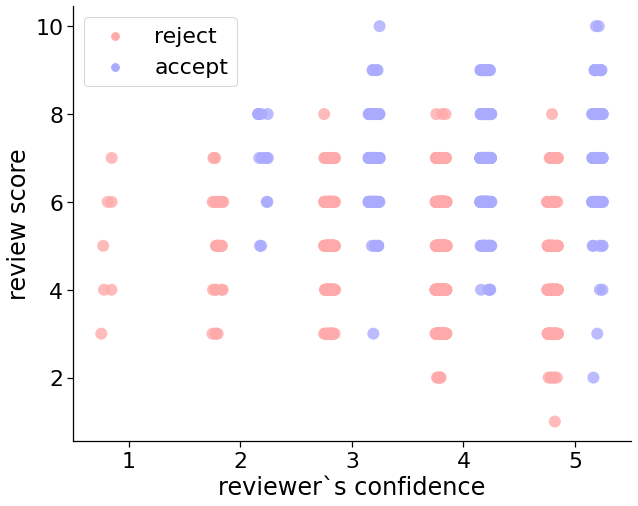

In [ ]:
sns.set_context("notebook", font_scale=2)
fig,ax = plt.subplots(figsize = (10,8))
g=sns.stripplot(data=reviews, x='confidence', y='recommendation', hue='accept', palette='bwr_r', dodge=True, size=12, jitter=True, edgecolor='none', alpha=.80)
sns.despine()
plt.ylabel('review score')
plt.xlabel('reviewer`s confidence') 
leg = g.axes.get_legend()
new_labels = ["reject","accept"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
leg.set_title('')

plt.savefig(path+'confidence',  dpi=400, bbox_inches = 'tight', pad_inches = 0 )


# YellowBrick

In [ ]:
df2 = reviews.assign(id=(reviews['title']).astype('category').cat.codes)

KeyError: ignored

In [ ]:
sum(df2.accept)/len(df2)

0.4005602240896359

In [ ]:
ids     = df2.id.unique()

In [ ]:
# take a look, numbers don't match

In [ ]:
X0 = [df2.loc[df2['id'] == id].title.unique().tolist() for id in ids]
Y0 = [df2.loc[df2['id'] == id].recommendation.unique().tolist() for id in ids]

X = [item for sublist in X0 for item in sublist]
Y = [item for sublist in Y0 for item in sublist]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to spec

TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f8466770e50>,
               classes=None, colormap=None, colors=None, decompose=None,
               decompose_by=None, labels=None, random_state=None)

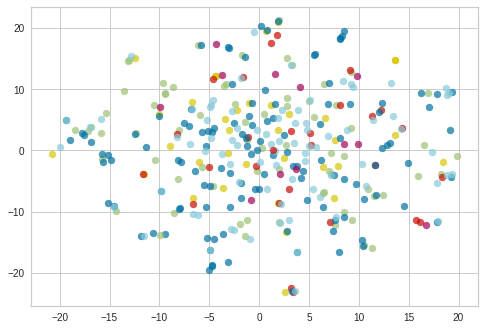

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer

tfidf = TfidfVectorizer()

x = tfidf.fit_transform(X)

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(x, Y)

# Review Length

In [ ]:
from collections import Counter

results = Counter()
reviews['comments'].str.lower().str.split().apply(results.update)
print(results)


Counter({'the': 27437, 'of': 10385, 'to': 10260, 'is': 9226, 'a': 8224, 'and': 7284, 'in': 6712, 'this': 4835, 'that': 4578, 'for': 4038, 'be': 3452, 'it': 3444, 'paper': 3324, 'on': 3190, 'are': 3072, 'not': 3051, 'i': 2874, 'with': 2537, 'as': 2434, 'an': 1794, '-': 1625, 'would': 1618, 'authors': 1576, 'model': 1519, 'more': 1506, 'from': 1490, 'by': 1464, 'but': 1446, 'which': 1264, 'can': 1246, 'have': 1145, 'results': 1110, 'or': 1079, 'proposed': 1019, 'also': 978, 'some': 973, 'very': 962, 'learning': 922, 'how': 917, 'if': 897, 'work': 877, 'there': 853, 'at': 851, 'method': 825, 'using': 808, 'one': 795, 'interesting': 780, 'seems': 776, 'what': 775, 'should': 769, 'experiments': 765, 'than': 764, 'could': 745, 'training': 742, 'other': 739, 'approach': 736, 'they': 728, 'only': 715, 'network': 696, 'different': 687, 'does': 656, 'do': 654, 'use': 636, 'neural': 630, 'these': 613, 'think': 613, 'well': 612, 'like': 610, 'used': 607, 'you': 605, 'has': 583, 'better': 580, 'et'

In [ ]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

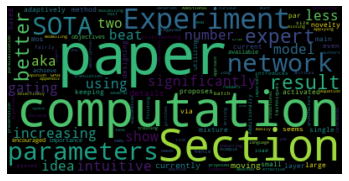

In [ ]:
# Start with one review:
text = reviews.comments[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(review for review in reviews.comments)
print ("There are {} words in the combination of all review.".format(len(text)))


There are 2339594 words in the combination of all review.


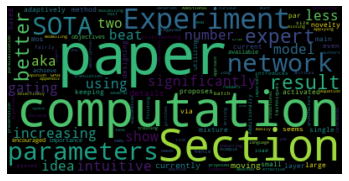

In [ ]:
wc = WordCloud(stopwords=STOPWORDS, background_color="white", width=1200, height=800,).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()





In [ ]:
reviews.groupby("accept").describe()

recommendation                                ... confidence                    
                count      mean       std  min  25%  ...        min  25%  50%  75%  max
accept                                               ...                               
False           779.0  4.820282  1.245475  1.0  4.0  ...        1.0  3.0  4.0  4.0  5.0
True            530.0  6.947170  1.083055  2.0  6.0  ...        2.0  3.0  4.0  4.0  5.0

[2 rows x 16 columns]

In [ ]:
df1.groupby("accept").describe()

recommendation                                ... confidence                    
                count      mean       std  min  25%  ...        min  25%  50%  75%  max
accept                                               ...                               
False          1284.0  4.817757  1.248336  1.0  4.0  ...        1.0  3.0  4.0  4.0  5.0
True            858.0  6.967366  1.092611  2.0  6.0  ...        2.0  3.0  4.0  4.0  5.0

[2 rows x 16 columns]

In [ ]:
df2.groupby("accept").describe()

recommendation                                ... confidence                    
                count      mean       std  min  25%  ...        min  25%  50%  75%  max
accept                                               ...                               
False           134.0  5.208955  1.183055  2.0  4.0  ...        2.0  3.0  4.0  4.0  5.0
True            112.0  6.857143  1.129914  4.0  6.0  ...        2.0  3.0  4.0  4.0  5.0

[2 rows x 16 columns]

In [ ]:
df3.groupby("accept").describe()

recommendation                                ... confidence                    
                count      mean       std  min  25%  ...        min  25%  50%  75%  max
accept                                               ...                               
False           140.0  4.471429  1.171870  2.0  4.0  ...        1.0  3.0  4.0  4.0  5.0
True             90.0  6.866667  0.914306  4.0  6.0  ...        2.0  3.0  4.0  4.0  5.0

[2 rows x 16 columns]

In [ ]:
Comments_Accept = " ".join([item.comments for id, item in reviews.iterrows() if item.accept])
Comments_Reject = " ".join([item.comments for id, item in reviews.iterrows() if not item.accept])

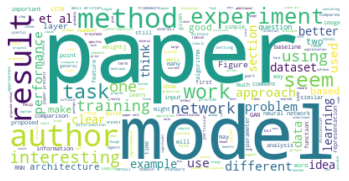

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(Comments_Accept)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

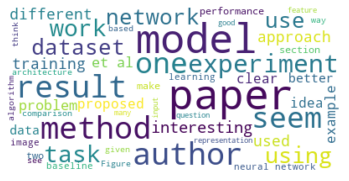

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=50, max_words=50, background_color="white").generate(Comments_Reject)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
import re
from pandas import DataFrame
import matplotlib.pyplot as plt

In [ ]:
stopwords = wordcloud.stopwords.union(set(['-','.','e.g.','et al', 'models']))

In [ ]:
all_words = []
for item in reviews['comments'].str.lower().str.split():
  for word in item:
    if not word in stopwords:
      all_words.append(re.sub('[()]', '', word)) # remove parantheses

In [ ]:
count_words = list(sorted(Counter(all_words).items(), key=lambda item: item[1]))
count_words.reverse()

In [ ]:
count_words[:20]

[('paper', 3340),
 ('authors', 1579),
 ('model', 1526),
 ('results', 1114),
 ('proposed', 1020),
 ('learning', 932),
 ('work', 883),
 ('method', 829),
 ('using', 819),
 ('one', 803),
 ('interesting', 781),
 ('seems', 777),
 ('experiments', 766),
 ('training', 749),
 ('approach', 737),
 ('network', 703),
 ('different', 690),
 ('use', 636),
 ('neural', 633),
 ('think', 613)]

In [ ]:
count_words_df = DataFrame(count_words[:15],columns=['word','number'])

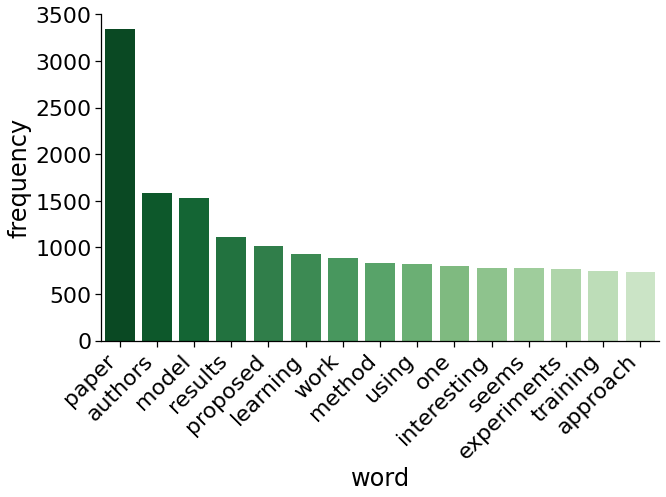

In [ ]:
pal=sns.color_palette("Greens_r",n_colors=len(count_words_df)+4)
sns.set_context("notebook", font_scale=2)
plt.figure(figsize=(10,6))
chart = sns.barplot(data=count_words_df, x='word', y='number', palette=pal)
sns.despine()
plt.ylabel('frequency')
plt.ylim(0,3500)
plt.xlabel('word')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
plt.savefig(path+'words',  dpi=400, bbox_inches = 'tight', pad_inches = 0 )

In [ ]:
Comments_Accept_List = Comments_Accept.lower().replace('.','').replace(',','').replace('\n','').replace(':','').split(' ')

In [ ]:
all_words_accept = []
for word in list(filter(None, Comments_Accept_List)):
  if not word in stopwords:
    all_words_accept.append(re.sub('[()]', '', word)) # remove parantheses

In [ ]:
count_words_accept = list(sorted(Counter(all_words_accept).items(), key=lambda item: item[1]))
count_words_accept.reverse()

In [ ]:
count_words_df_accept = DataFrame(count_words_accept[:15],columns=['word','number'])

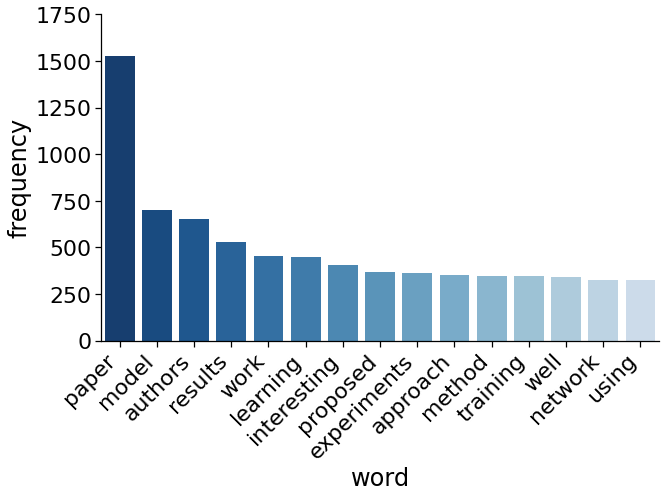

In [ ]:
pal=sns.color_palette("Blues_r",n_colors=len(count_words_df)+4)
sns.set_context("notebook", font_scale=2)
plt.figure(figsize=(10,6))
chart = sns.barplot(data=count_words_df_accept, x='word', y='number', palette=pal)
sns.despine()
plt.ylabel('frequency')
plt.ylim(0,1750)
plt.xlabel('word')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
plt.savefig(path+'Acceptwords',  dpi=400, bbox_inches = 'tight', pad_inches = 0 )

In [ ]:
Comments_Reject_List = Comments_Reject.lower().replace('.','').replace(',','').replace('\n','').replace(':','').split(' ')

In [ ]:
all_words_reject = []
for word in list(filter(None, Comments_Reject_List)):
  if not word in stopwords:
    all_words_reject.append(re.sub('[()]', '', word)) # remove parantheses

In [ ]:
count_words_reject = list(sorted(Counter(all_words_reject).items(), key=lambda item: item[1]))
count_words_reject.reverse()

In [ ]:
count_words_df_reject = DataFrame(count_words_reject[:15],columns=['word','number'])

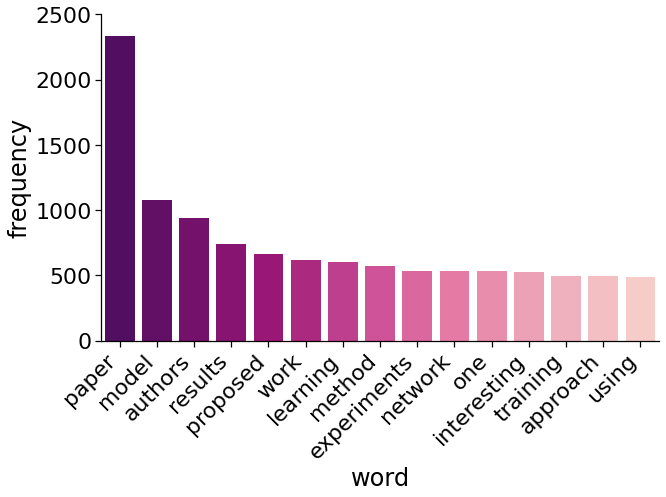

In [ ]:
pal=sns.color_palette("RdPu_r",n_colors=len(count_words_df)+4)
sns.set_context("notebook", font_scale=2)
plt.figure(figsize=(10,6))
chart = sns.barplot(data=count_words_df_reject, x='word', y='number', palette=pal)
sns.despine()
plt.ylabel('frequency')
plt.ylim(0,2500)
plt.xlabel('word')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
plt.savefig(path+'Rejectwords',  dpi=400, bbox_inches = 'tight', pad_inches = 0 )

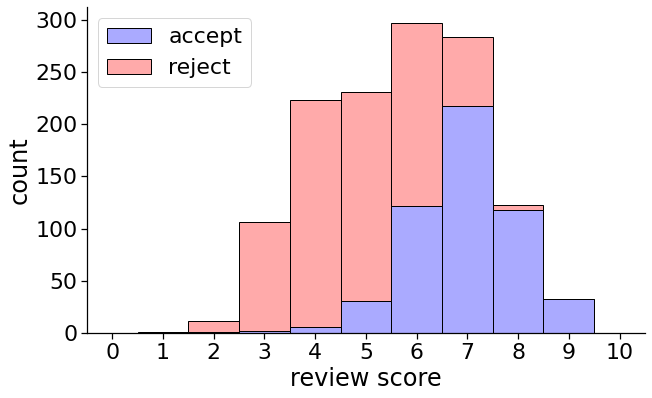

In [ ]:
sns.set_context("notebook", font_scale=2)
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=reviews, x='recommendation',  hue='accept', multiple="stack", palette='bwr_r', alpha=1, binwidth=1,ax=ax)
plt.xticks(np.arange(0.5,11,1),labels=range(0,11,1))
plt.xlim(0,11)
# mids = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]
# ax.set_xticks(mids)
sns.despine()
plt.ylabel('count')
plt.xlabel('review score')


plt.legend(['accept', 'reject'])
plt.savefig(path+'hist',  dpi=400, bbox_inches = 'tight', pad_inches = 0)